In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, extract


In [4]:
# Create Engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [5]:
# Reflect an existing database into a new model

# Note: Sets an object to utilize the default base (database) in SQL Alchemy
base = automap_base()

# Reflect the tables
base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results (plot below)
inspector=inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns("measurement")

# Note: You can also run code below to test database connection and select all values for only date and precipitation.
# session.query(measurement.date, measurement.prcp).all()


In [10]:
# Find the last date
# Note: Need ending ".date" otherwise comes in as string and won't work with twelve_months calculation
last_date=session.query(measurement.date).order_by(measurement.date.desc()).first().date
last_date

'2017-08-23'

In [11]:
# Calculate date that is 12 months from the last date
twelve_months = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)
twelve_months

datetime.datetime(2016, 8, 23, 0, 0)

In [12]:
# Retrieve the last 12 months of precipitation data in measurement.prcp
# NOTE in first line of code, do I need "funct.avg?
# POTATO: >> precip_data = session.query(measurement.date, func.avg(measurement.prcp)).\
last_year = session.query(measurement.date, measurement.prcp).\
                    filter(measurement.date >= twelve_months).\
                    group_by(measurement.date).all()
last_year

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Note: Data = the last 12 months of precipitation
year_precip_df = pd.DataFrame(last_year, columns=["Date", "Precipitation"])
year_precip_df.set_index("Date")

# Sort the dataframe by date
# Note: Inplace=true means to overwrite the existing dataframe in it's place
year_precip_df.sort_values(by=["Date"], inplace=True)

year_precip_df.head(10)

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
5,2016-08-29,0.00
6,2016-08-30,0.00
7,2016-08-31,0.13
8,2016-09-01,0.00
9,2016-09-02,0.00


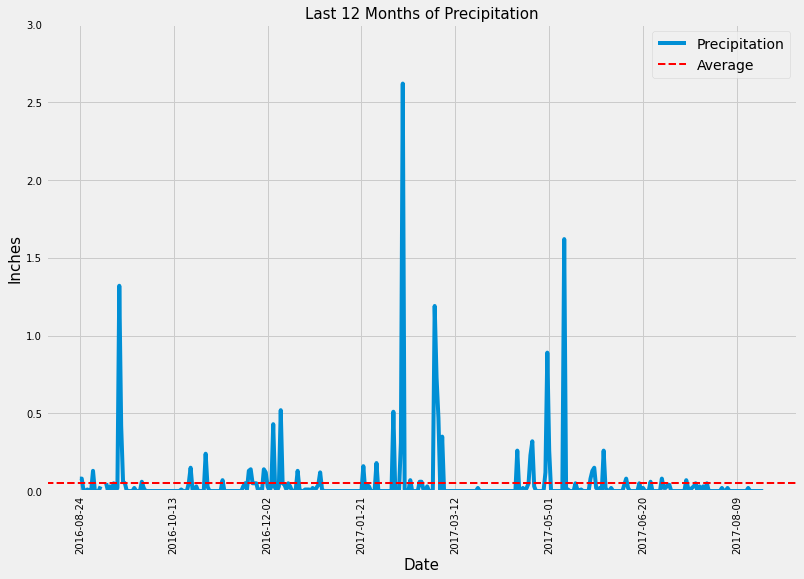

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
# Note: Plotting results from last 12 months of precipitation data
year_precip_df.plot("Date", "Precipitation", figsize=(12,8))
                                             
plt.ylim(0,3)
plt.title("Last 12 Months of Precipitation", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Inches", fontsize=15)
plt.legend(["Precipitation"])
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Note: Added mean horizontal line
plt.axhline(year_precip_df["Precipitation"].mean(), color="r", linestyle="dashed", linewidth=2, label="Average")
plt.legend()

# Save chart image (optional)
# Note: put this before plt.show otherwise image will save as black box.
plt.savefig("images/Last_12Months_Precipitation.png")

# Display chart
plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
# Note: use .describe() and round decimals
year_precip_df.describe().round(decimals=2)

,Precipitation
count,363.00
mean,0.05
std,0.21
min,0.00
25%,0.00
50%,0.00
75%,0.02
max,2.62


In [30]:
# Design a query to show how many stations are available in this dataset
station_count=session.query (station.station).count()
print(f"There are {station_count} available stations in this dataset.")

#Potato - do I need this code? >> session.query(station.id).count()

There are 9 available stations in this dataset.


In [33]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# Note: Using \ to line wrap long code string for easier coding and troubleshooting. Tab spacing is optional.
station_results = session.query(measurement.station,func.count(measurement.station))\
                .group_by(measurement.station)\
                .order_by(func.count(measurement.station)\
                .desc()).all()
station_results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [34]:
# Note: s_results[0][0] returns only the station, s_results[0] returns both station and total observations (tobs) count
most_active = station_results [0][0]
station_results [0][0]


'USC00519281'

In [35]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs))\
              .filter(measurement.station == most_active).all()


[(54.0, 85.0, 71.66378066378067)]

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#POTATO - start here. Can I use same code as most active stations???

## SANDBOX CODE

In [ ]:
#This code works...
#best_station = s_results[0][0]
#session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
#                filter(Measurement.station == best_station).all()

In [ ]:
# POTATO - this code is same as below but with word wrap
#active_station=session.query(measurement.station,func.count(measurement.tobs)).group_by(measurement.station).order_by(func.count(measurement.tobs).desc()).all()
#active_station

In [ ]:
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs))\
.group_by(measurement.station).\
filter(measurement.station=='USC00519281').all()

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
active_count = active_station [0][0]
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs))\
              #.group_by(measurement.station)\
              .filter(measurement.station == active_station).all()


In [ ]:
# POTATO - toss this row at end. Duplicate of row below. Design a query to show how many stations are available in this dataset
station_count=session.query (measurement.station).group_by(measurement.station).count()
print(f"There are {station_count} available stations in this dataset.")

In [ ]:
# Note: This is not needed - Create a dataframe for stations
measure_df = pd.read_sql("SELECT * from measurement", conn)
measure_df.head()



In [ ]:
# POTATO - start here to see if you can subtract a year from above date and display results.
#session.query(measurement.date).filter(measurement.date)==2017).all()

In [ ]:



# Note - Trying to use SQL in this section. Rry Name or another unique field name.
# Code below is incomplete. Will need join measurements and stations, and then a count on stations from "measurements" table
stations = pd.read_sql("SELECT * FROM station", conn)
stations.head(10)

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

# Note: Create a dataframe for measurements
station_df = pd.read_sql("SELECT * from station", conn)
station_df.head()



In [ ]:
#end_date = datetime.date(year, month, num_days)
#end_date

In [ ]:
#last_date = last_date - relativedelta(months= 12)
#print(date_one_year_ago)

In [ ]:
#results = session.query(Event).filter(
#    and_(Event.date >= start_date, Event.date <= end_date)).all()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`


In [ ]:
session.close()